## Importing for packages

In [88]:
# Import these packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom #Read mammogram images stored in DICOM files
import cv2
import random
import os

In [9]:
path = r"/Users/isa/Google Drive/cancer-data/"
!ls "{path}"

BenignCalc    BenignMass    MalignantCalc MalignantMass repeat


In [50]:
files=os.listdir(path+"Malignant")
files[:10]

['Malignant-calc1',
 'Malignant-calc10',
 'Malignant-calc100',
 'Malignant-calc101',
 'Malignant-calc102',
 'Malignant-calc103',
 'Malignant-calc104',
 'Malignant-calc105',
 'Malignant-calc106',
 'Malignant-calc107']

## Crosschecking files for "black images"

In [23]:
# Contiguous Stacker
def stacker(path):
    files=os.listdir(path)
    for x in range(0,len(files),10):
        img_top_stack=[return_image(path,file) for file in files[x:x+5]]
        img_bottom_stack=[return_image(path,file) for file in files[x+5:x+10]]
        yield np.vstack([np.hstack(img_top_stack),np.hstack(img_bottom_stack)])
        
def return_image(path,file):
    return cv2.resize(pydicom.dcmread(os.path.join(path,file),force=True).pixel_array,(400,400))

In [86]:
path="/Users/isa/Google Drive/cancer-data/BenignCalc"
img_gen=stacker(path)

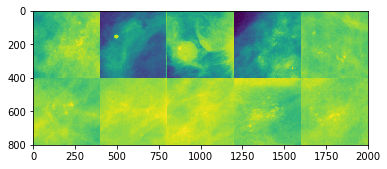

In [81]:
#plt.Axes(fig=(10,16))
plt.imshow(next(img_gen))

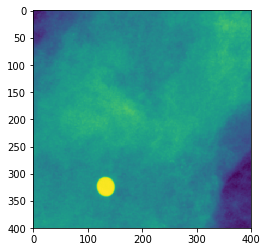

In [21]:
file=os.path.join(path,'Benign-calc589')
img=cv2.resize(pydicom.dcmread(file,force=True).pixel_array,(400,400))
plt.imshow(img)